In [0]:
%matplotlib inline

In [0]:
# Run this if you are using google colab (Download im_tutorial package)
!git clone -b 3-ysi-tutorial https://github.com/nestauk/im-tutorials.git 

In [0]:
# install other packages we need
!pip install ratelim pandas tenacity

# Introduction to requests and API's

## What you will be able to do after the tutorial

- Understand what a (RESTful) API is
- Understand what a HTTP request is
- Use Python to make requests to an API
- Use Python to work with JSON data
- Use Python to read JSON data into a Dataframe and plot it
- Understand how to overcome some real-world complexities when using API's
      
      

## Prerequisites

Before we get started with using API's in python we need to know a little more first.

### APIs : What and why
    
An API (Application Programming interface) is a way for two different applications to communicate. Whilst the term applies to any two programs we are using it to refer to the API of a web service that provides data.

To retrieve data from an API, a request to a remote web server is made.

For example, if you want to build an application which plots stock prices, you would use the API of something like google finance to request the current stock prices.

APIs are useful where:
* Data is changing quickly, e.g. stock prices
* The whole dataset is not required, e.g. the tweets of one user
* Repeated computation is involved, e.g. Spotify API that tells you the genre of a piece of music

#### REST

Most API's you come across will be RESTful, i.e. they provide a REST (REpresentational State Transfer) interface.

REST uses standard HTTP commands which means that getting data from an API is similar to accessing a webpage. 

For example, When you type `www.duckduckgo.com` in your browser, your browser is asking the `www.duckduckgo.com` server for a webpage by making a `GET` HTTP (Hypertext Transfer Protocol) request. Making a `GET` request to a RESTful API instead retrieves data (rather than a webpage).

Similarly, while your browser uses `POST` to submit the contents of a form, REST APIs use `POST` to update data.

REST APIs also uses other HTTP commmands such as `PUT` - for creating data - and `DELETE` - for removing data.

HTTP is a text-based protocol (the response is always text) and could return a response in any format - this is typically found in the API documentation - though data is more often than not returned in JSON format.

As they are used to retrieve data `GET` requests are the most commonly used type of request, therefore we will restrict ourselves to `GET` in this tutorial.

#### JSON

JSON (JavaScript Object Notation) is a format for sending data, that is meant to be human readable and easy to parse (It was derived from JavaScript but is language-independent).

It uses attribute-value pairs (e.g. python dictionaries `{"name": "Pizza", "foodRanking": 1}`) and array data-types (e.g. python lists `[1, 2, 3]`)

Example JSON representation :
```
{
  "firstName": "Donald",
  "lastName": "Trump",
  "age": 73,
  "isAlive": true,
  "color": "orange",
  "addresses": [
      {
          "streetAddress": "1600 Pennsylvania Avenue NW",
          "city": "Washington, D.C.",
          "state": "null",
          "postalCode": "20500",
          "country": "US"
      },
      {
          "streetAddress": "721 Fifth Avenue",
          "city": "NYC",
          "state": "NY",
          "postalCode": "10022",
          "country": "US"
      }
  ],
}
```


#### Status codes

So we've sent off some mystery `GET` request but how do we know the request was successful?

Servers issue numeric [status codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) in response to HTTP requests that indicate whether a request has been successfully completed.

Some common ones relating to `GET` requests are:
* `200` - Success
* `300` - The API is redirecting to a different endpoint
* `400` - Bad request
* `401` - Not authenticated
* `403` - Forbidden
* `404` - Not found
* `429` - Too many requests

### Pandas - the absolute basics

We will be using Pandas (a contraction of 'panel' and 'data'). Pandas is a python library for doing practical, real world data analysis.

Being comfortable with using pandas is a tutorial (or set of tutorials) alone$^{*}$, so don't worry if you're unfamiliar, but we will pick up the basics.

\* *(See the resources section at the end of this tutorial for more resources on pandas)*

The main data-structure in pandas is the dataframe, it stores rows of observations over columns of variables. Lets see how it works...

#### Construct a DataFrame

In [0]:
import pandas as pd  # Import the package

# Some input data - a small sample of the iris dataset
data = {
    'sepal_length': [6.9, 6.9, 4.8, 5.4, 4.6],
    'sepal_width': [3.2, 3.1, 3.4, 3.0, 3.6],
    'petal_length': [5.7, 5.1, 1.9, 4.5, 1.0],
    'petal_width': [2.3, 2.3, 0.2, 1.5, 0.2],
    'species': ['virginica', 'virginica', 'setosa', 'versicolor', 'setosa']
}

df = pd.DataFrame(data)

df # Typing a variable at the end of a cell will print it out

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.9,3.2,5.7,2.3,virginica
1,6.9,3.1,5.1,2.3,virginica
2,4.8,3.4,1.9,0.2,setosa
3,5.4,3.0,4.5,1.5,versicolor
4,4.6,3.6,1.0,0.2,setosa


#### Indexes

In [0]:
df.index  # Access the index

RangeIndex(start=0, stop=5, step=1)

In [0]:
# Change the index
df.index = [2, 3, 4, 5, 6]
print(df.index)  # Access the index
df

Int64Index([2, 3, 4, 5, 6], dtype='int64')


,sepal_length,sepal_width,petal_length,petal_width,species
2,6.9,3.2,5.7,2.3,virginica
3,6.9,3.1,5.1,2.3,virginica
4,4.8,3.4,1.9,0.2,setosa
5,5.4,3.0,4.5,1.5,versicolor
6,4.6,3.6,1.0,0.2,setosa


In [0]:
df.index = df.index - 1  # Change the index
df.index  # Access the index

Int64Index([1, 2, 3, 4, 5], dtype='int64')

#### COLUMNS

In [0]:
df.columns  # Access the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [0]:
# Change the columns
df.columns = ['sepal_length', 'sepal_width', 
              'petal_length', 'petal_width', 'SPECIES']
print(df.columns)
df

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'SPECIES'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,SPECIES
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica
3,4.8,3.4,1.9,0.2,setosa
4,5.4,3.0,4.5,1.5,versicolor
5,4.6,3.6,1.0,0.2,setosa


In [0]:
# Apply the `str.lower` function to every column
df.columns = map(str.lower, df.columns)
df.columns  # Access the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Accessing columns

In [0]:
# Access one column 
df.loc[:, 'sepal_length']

1    6.9
2    6.9
3    4.8
4    5.4
5    4.6
Name: sepal_length, dtype: float64

In [0]:
# Access one column (short-hand)
df['sepal_length']

1    6.9
2    6.9
3    4.8
4    5.4
5    4.6
Name: sepal_length, dtype: float64

In [0]:
# Access two columns
df.loc[:, ['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
1,6.9,3.2
2,6.9,3.1
3,4.8,3.4
4,5.4,3.0
5,4.6,3.6


In [0]:
# Access two columns (short-hand)
df[['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
1,6.9,3.2
2,6.9,3.1
3,4.8,3.4
4,5.4,3.0
5,4.6,3.6


#### Accessing rows

In [0]:
# Access one row 
df.loc[3, :]

sepal_length       4.8
sepal_width        3.4
petal_length       1.9
petal_width        0.2
species         setosa
Name: 3, dtype: object

In [0]:
# Access two rows
df.loc[[3, 0], :]
# Note: `0` is not an index so it's value's are `NaN` (not a number), i.e. missing

/home/alex/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,sepal_length,sepal_width,petal_length,petal_width,species
3,4.8,3.4,1.9,0.2,setosa
0,NaN,NaN,NaN,NaN,NaN


In [0]:
# Access a range of rows
df.loc[2:5, :]

,sepal_length,sepal_width,petal_length,petal_width,species
2,6.9,3.1,5.1,2.3,virginica
3,4.8,3.4,1.9,0.2,setosa
4,5.4,3.0,4.5,1.5,versicolor
5,4.6,3.6,1.0,0.2,setosa


In [0]:
# Access rows by index location (number starting from zero)
df.iloc[0:2, :]

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica


In [0]:
# Filter keeping only rows with `sepal_length` > 5
df[df.sepal_length > 5]

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica
4,5.4,3.0,4.5,1.5,versicolor


In [0]:
# Filter keeping only rows with `sepal_length` > 5 (alternative syntax)
df.query("sepal_length > 5")

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica
4,5.4,3.0,4.5,1.5,versicolor


#### Reading data from disk

Pandas can read files directly from a file (even excel files) and will automatically try and infer as much as it can about the structure of the data)

``` python
filename = 'Your_filename_here.json'
df = pd.read_json(filename)

filename = 'Your_filename_here.csv'
df = pd.read_csv(filename)

# Requires `xlrd` package to be installed
filename = 'Your_filename_here.xlsx'
df = pd.read_excel(filename)
```

In [0]:
# You may need to manually tell pandas some things about your dataset
# Lots of options detailed in the docs... 
pd.read_csv?

#### Adding new columns

In [0]:
df['new_column'] = 1
df

,sepal_length,sepal_width,petal_length,petal_width,species,new_column
1,6.9,3.2,5.7,2.3,virginica,1
2,6.9,3.1,5.1,2.3,virginica,1
3,4.8,3.4,1.9,0.2,setosa,1
4,5.4,3.0,4.5,1.5,versicolor,1
5,4.6,3.6,1.0,0.2,setosa,1


In [0]:
df['new_column'] = [1, 2, 3, 4, 5]
df

,sepal_length,sepal_width,petal_length,petal_width,species,new_column
1,6.9,3.2,5.7,2.3,virginica,1
2,6.9,3.1,5.1,2.3,virginica,2
3,4.8,3.4,1.9,0.2,setosa,3
4,5.4,3.0,4.5,1.5,versicolor,4
5,4.6,3.6,1.0,0.2,setosa,5


In [0]:
df['new_column'] = df['sepal_length'] - df['petal_length']
df

,sepal_length,sepal_width,petal_length,petal_width,species,new_column
1,6.9,3.2,5.7,2.3,virginica,1.2
2,6.9,3.1,5.1,2.3,virginica,1.8
3,4.8,3.4,1.9,0.2,setosa,2.9
4,5.4,3.0,4.5,1.5,versicolor,0.9
5,4.6,3.6,1.0,0.2,setosa,3.6


## Example API: Eurostat

Let's dive in by looking at an API that can be of use to us, the [EUROSTAT API](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services).

The documentation linked gives a very useful summary of the structure of the requests:
![](https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/APIs/figures/eurostat_api.png?raw=1)
 
* host_url : fixed part of the request related to our website
* service : fixed part of the request related to the service
* version : fixed part of the request related to the version of the service
* format : data format to be returned (json or unicode)
* lang : language used for metadata (en/fr/de)
* datasetCode : unique code identifier of the queried dataset
* filters : specify the scope of the query (optional). There is a threshold of maximum 50 sub-indicators per query. The filters are specific to a dataset, depending on dataset dimensions.
    * precision : the number of decimals for the values returned by the request
    * unit : filter on the dataset's UNIT dimension 

We'll learn by example how to use Python to get the data for a REST GET request on this dataset (`nama_10_gdp`).

We will use the Python library `requests` - https://github.com/psf/requests.

In [0]:
import requests  # Import the requests library

# Query URL
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/nama_10_gdp?precision=1'
       '&unit=CLV05_MEUR'  # Unit: CLV (2005) Million EUR
       '&geo=NL&geo=DE'  # Country: Netherlands, Germany
       '&time=2010&time=2011&time=2012'  # Years: 2010, 2011, 2012
       '&na_item=B1GQ&na_item=D21'  # GDP (market prices) & taxes on products
       )
# Some api's will have nicer syntax like:
# `&time=2010..2012` or `&na_item=B1GQ,D21`
print(url)

response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)
# NOTE: Could use print(response.json()) but this wouldn't be formatted nicely

http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?precision=1&unit=CLV05_MEUR&geo=NL&geo=DE&time=2010&time=2011&time=2012&na_item=B1GQ&na_item=D21
Request returned 200 : 'OK'
{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'DE': 0, 'NL': 1},
                                    'label': {'DE': 'Germany (until 1990 '
                                                    'former territory of the '
                                                    'FRG)',
                                              'NL': 'Netherlands'}},
                       'label': 'geo'},
               'na_item': {'category': {'index': {'B1GQ': 0, 'D21': 1},
                                        'label': {'B1GQ': 'Gross domestic '
                                                          'product at market '
                                                          'prices',
                                                  'D21': 'Taxes on products'}},
                      

---

**Tip:** it's easy to forget what attributes a variable like `response` has - was it `status_code` or `status`?
Use the function `dir` to list the contents of a variable.

``` python
dir(response)
```

If you're in a jupyter notebook you can also type "response." and then press `TAB` and an autocomplete bar will pop up.

---

**SUCCESS!** But what's the structure of our data?

In [0]:
payload['value']  # The values returned aren't very informative!

{'0': 2426650.8,
 '1': 2521875.8,
 '2': 2532456.4,
 '3': 589946.6,
 '4': 599097.8,
 '5': 592925.0,
 '6': 228297.9,
 '7': 237275.9,
 '8': 236325.2,
 '9': 60631.6,
 '10': 59852.5,
 '11': 57924.1}

In [0]:
list(zip(payload['id'], payload['size']))  # Dimensions of our data (1 x 2 x 2 x 3)

[('unit', 1), ('na_item', 2), ('geo', 2), ('time', 3)]

In [0]:
payload['dimension']  # Gives us the dimension details of the data

{'unit': {'label': 'unit',
  'category': {'index': {'CLV05_MEUR': 0},
   'label': {'CLV05_MEUR': 'Chain linked volumes (2005), million euro'}}},
 'na_item': {'label': 'na_item',
  'category': {'index': {'B1GQ': 0, 'D21': 1},
   'label': {'B1GQ': 'Gross domestic product at market prices',
    'D21': 'Taxes on products'}}},
 'geo': {'label': 'geo',
  'category': {'index': {'DE': 0, 'NL': 1},
   'label': {'DE': 'Germany (until 1990 former territory of the FRG)',
    'NL': 'Netherlands'}}},
 'time': {'label': 'time',
  'category': {'index': {'2010': 0, '2011': 1, '2012': 2},
   'label': {'2010': '2010', '2011': '2011', '2012': '2012'}}}}

We want to extract the indices from each dimension of the data (e.g. 'DE' and 'NL' for 'geo') and enumerate all the possible index combinations in order to build the index for the values in `payload['value']`.

Lets first extract the indices...

In [0]:
list_of_keys = []
for k in payload['id']:
    list_of_keys.append(
        payload['dimension'][k]['category']['index'].keys()
        )
print(list_of_keys)
    
# NOTE: Equivalent to: [payload['dimension'][k]['category']['index'].keys() for k in payload['id']]

[dict_keys(['CLV05_MEUR']), dict_keys(['B1GQ', 'D21']), dict_keys(['DE', 'NL']), dict_keys(['2010', '2011', '2012'])]


Now we want to enumerate all the combinations.

Fortunately pandas has a function `pd.MultiIndex.from_product` that will do this for us, and let us (optionally) name each of the dimensions by passing a `names=` argument.

In [0]:
index = pd.MultiIndex.from_product(
    list_of_keys, names=payload['id']
)
index

MultiIndex([('CLV05_MEUR', 'B1GQ', 'DE', '2010'),
            ('CLV05_MEUR', 'B1GQ', 'DE', '2011'),
            ('CLV05_MEUR', 'B1GQ', 'DE', '2012'),
            ('CLV05_MEUR', 'B1GQ', 'NL', '2010'),
            ('CLV05_MEUR', 'B1GQ', 'NL', '2011'),
            ('CLV05_MEUR', 'B1GQ', 'NL', '2012'),
            ('CLV05_MEUR',  'D21', 'DE', '2010'),
            ('CLV05_MEUR',  'D21', 'DE', '2011'),
            ('CLV05_MEUR',  'D21', 'DE', '2012'),
            ('CLV05_MEUR',  'D21', 'NL', '2010'),
            ('CLV05_MEUR',  'D21', 'NL', '2011'),
            ('CLV05_MEUR',  'D21', 'NL', '2012')],
           names=['unit', 'na_item', 'geo', 'time'])

Now our index is built we can pass in a list of values, index, and columns to `pd.DataFrame`.

In [0]:
df = pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
df

value
unit       na_item geo time           
CLV05_MEUR B1GQ    DE  2010  2426650.8
                       2011  2521875.8
                       2012  2532456.4
                   NL  2010   589946.6
                       2011   599097.8
                       2012   592925.0
           D21     DE  2010   228297.9
                       2011   237275.9
                       2012   236325.2
                   NL  2010    60631.6
                       2011    59852.5
                       2012    57924.1

---

We can calculate the means (across years) for each country and each `na_item` using `.groupby(...)` on a DataFrame.

`groupby` simply groups a dataframe over the indexes/columns that are passed to it, on which we can then apply an aggregation function such as `.mean()`

In [0]:
df_means = (df.groupby(['na_item', 'geo'])
            .mean()
           )
df_means

value
na_item geo              
B1GQ    DE   2.493661e+06
        NL   5.939898e+05
D21     DE   2.339663e+05
        NL   5.946940e+04

---

We can "unstack" indexes to become columns...

In [0]:
df.unstack('na_item')



value          
na_item                   B1GQ       D21
unit       geo time                     
CLV05_MEUR DE  2010  2426650.8  228297.9
               2011  2521875.8  237275.9
               2012  2532456.4  236325.2
           NL  2010   589946.6   60631.6
               2011   599097.8   59852.5
               2012   592925.0   57924.1

Note the `value` at the top level of the columns above - this means we can't do `df['D21']` directly, but have to do `df['value']['D21']  (or drop the `value` level from our dataframe which we will see below).


We can reverse what we just did with "stack".
`stack` makes a dataset longer (taller) and `unstack` makes a dataset wider

In [0]:
(df
 .unstack('na_item')
 .stack('na_item')
 )

value
unit       geo time na_item           
CLV05_MEUR DE  2010 B1GQ     2426650.8
                    D21       228297.9
               2011 B1GQ     2521875.8
                    D21       237275.9
               2012 B1GQ     2532456.4
                    D21       236325.2
           NL  2010 B1GQ      589946.6
                    D21        60631.6
               2011 B1GQ      599097.8
                    D21        59852.5
               2012 B1GQ      592925.0
                    D21        57924.1

Ok, lets:
* Unstack `na_items` and `geo` as before
* Drop the `unit` index (which only has one value)
* Drop the `value` column level
* Turn the output into a bar plot

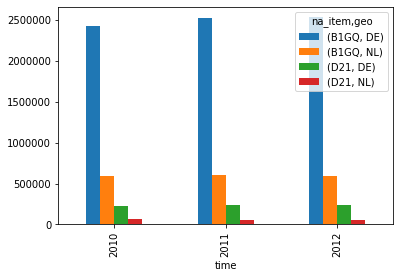

In [0]:
(df
 .unstack(['na_item', 'geo'])  # unstacks indices (makes our dataset wider)
 .droplevel('unit', axis=0)  # Everything is in the same unit so we drop it
 .droplevel(0, axis=1)  # OR: ['value']
 .plot(kind='bar')  # Make a bar plot
 )

We can also chain our commands together rather than storing the intermediate values.
This makes it easier to read the flow of operations but removes the ability to inspect intermediate results.

In [0]:
# Look at the documentation for the plot function below and see what types of plot you can make
pd.DataFrame.plot?

### Real-world considerations for Requests

Things do not always go so nicely, particularly when using API's at scale.

We'll quickly cover some other common considerations when using API's, and outline how they can be solved.

#### Retries

Sometimes you can do everything perfectly, and send off a request but something on the web-server (or elsewhere) can go wrong and give a bad status code.
We don't want to silently ignore these errors or let them crash our program by raising an exception.

The first port of call is to retry the request again.

---

A hacky way to do this would be (**don't do this**):

``` python
import time
import requests

def get(url):
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise an error on a bad status
    except:
        time.sleep(1)  # sleep for a bit in case that helps
        return get(url)  # try again
```

---

A better and easier way to do this is to use the [tenacity](https://github.com/jd/tenacity) library:

``` python
import requests
from tenacity import (retry, stop_after_attempt, wait_fixed,
                      retry_if_exception_type)

@retry(stop=stop_after_attempt(3), wait=wait_fixed(0.1),
      retry=retry_if_exception_type(requests.HTTPError))
def get(url):
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise an error on a bad status
        return r
    except requests.HTTPError:
        print(r.status_code, r.reason)
        raise
```

It uses a python decorator (the `@` symbol) to wrap our function with another function `retry` that will retry if we raise an error.

We can tell it how many times to stop trying after, how long to wait between each retry, what error to retry on etc.

#### Authentication

Not all API's are open for immediate use. For example, some require you pay for access (e.g. the google maps API) and some require you to register for access first.

When you get access to a "closed" API, you will typically get an API key - a long string of letters and numbers - which is unique to you which you need to send along with any GET request you make to the API.
This lets the API know who you are and decide how to deal with your request.

Several different types of authentication exists (read the specific API docs) but the most common way is:
``` python
api_key = 'asodifhafglkkhj'
r = requests.get(url, auth=(api_key, ''))
```

#### Rate limits

API's can be costly to host and typically limit the number of requests that can be made (either by an IP or API key).
If you exceed this limit you'll get a `429` status code for any extra requests you make (and may be blocked if you continue making them).

It is important to therefore respect any rate limits given in an API's documentation (annoyingly some are very vague).
The simplest way to do this is to limit how often the number of times our function that makes the request can be called within some time limit using the [ratelim](https://pypi.org/project/ratelim/) library - again using decorators.

In [0]:
import ratelim
import time

# 10 times in 5 seconds as fast as possible
@ratelim.greedy(10, 5)
def hello_greedy(i):
    print(i, "hello")
    
# Fast
t0 = time.time()
for i in range(10):
    hello_greedy(i)
print(f"Took {(time.time() - t0):.3f} seconds")

0 hello
1 hello
2 hello
3 hello
4 hello
5 hello
6 hello
7 hello
8 hello
9 hello
Took 0.001 seconds


In [0]:
# 10 times in 5 seconds as fast as possible
@ratelim.greedy(10, 5)
def hello_greedy(i):
    print(i, "hello")

# Takes ~5 seconds because we hit the rate limit
t0 = time.time()
for i in range(11):
    hello_greedy(i)
print(f"Took {(time.time() - t0):.3f} seconds")

0 hello
1 hello
2 hello
3 hello
4 hello
5 hello
6 hello
7 hello
8 hello
9 hello
10 hello
Took 5.007 seconds


In [0]:
# 10 times in 5 seconds
# Gets called at most every 0.5 seconds
@ratelim.patient(10, 5)
def hello_patient(i):
    print(i, "hello")

# Takes ~4.5s
t0 = time.time()
for i in range(10):
    hello_patient(i)
print(f"Took {(time.time() - t0):.3f} seconds")

0 hello
1 hello
2 hello
3 hello
4 hello
5 hello
6 hello
7 hello
8 hello
9 hello
Took 4.515 seconds


Using `ratelim.patient` is kinder to the API you are using as you lower the risk of overwhelming the API and getting a batch of responses with bad statuses.

## Exercise

**Task**

* Get the data for dataset `rd_e_berdindr2` from the Eurostat API for all NACE activities as a percentage of GDP
* Read the data into a pandas dataframe
* Calculate the total expenditure across countries each year
* Plot it

---
**Links**

* [Query builder](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder)
* [Data Explorer](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=rd_e_berdindr2&lang=en)
* [Metadata](https://ec.europa.eu/eurostat/cache/metadata/en/rd_esms.htm)

---
**Hint**
If you look at the data-explorer/metadata/response you will see that there won't be a `payload['value']` for every possible index - there is missing data.
To deal with this we can create a quick workaround by using a `defaultdict` from the `collections` library.
A default dict takes a function and a dictionary as arguements. When a value is looked up in the dictionary that isn't found it calls and returns the function passed to `defaultdict`. 

Below we create a `defaultdict` that returns `None` for indexes that aren't there and builds a new dictionary that fills in the missing data:

``` python
from collections import defaultdict
n = len(index)  # Length of our index
def return_none():
    return None
d = defaultdict(return_none, payload['value'])  # Build default dict
values = [
    d[str(i)]  # Lookup `i` in dictionary
    for i in range(n)  # Numberical indexes
]
```
NOTE: We use `str(i)` because the keys of the dictionaries are strings not integers so we need to convert

---
**EXTENSION**

Pick another dataset from Eurostat, fetch it and use a [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) operation to join the two datasets together.


---

[Solution (don't peek until you've tried)](https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/APIs/API_exercise_solution.ipynb)

In [0]:
## Template

# Make the request
import requests

url = ...

response = requests.get(url)
response.raise_for_status()  # Gives an error if not successful

# Parse into JSON
payload = ...

# Define the index from `payload['dimension']`
index = ...

# Get data values
values = ...

# Read into dataframe, manipulate and plot
(pd.DataFrame(values, index=index)
    # Make dataframe wider (~1 line(s))
    # Get totals (1 line)
    # Plot (1 line)
)

## Resources

### Assorted API snippets

In [0]:
## COMPANIES HOUSE (UK registrar of companies)
# Register for an api key here: https://developer.companieshouse.gov.uk/developer/signin

api_key = 'put your api key here'
url = 'https://api.companieshouse.gov.uk/search?q=consultio consultius'
r = requests.get(url, auth=(api_key, ''))
r.raise_for_status()

r.json()['items'][0]  # get the first item

# Example output
{'title': 'CONSULTIO CONSULTIUS CONSULTING  LIMITED',
 'snippet': '',
 'address': {'country': 'United Kingdom',
  'region': 'Uk',
  'address_line_1': 'Gibbons Close',
  'postal_code': 'GU47 9BB',
  'address_line_2': 'Sandhurst',
  'premises': '3 ',
  'locality': 'Berkshire'},
 'date_of_cessation': '2016-11-22',
 'date_of_creation': '2016-03-29',
 'kind': 'searchresults#company',
 'matches': {'title': [1, 9, 11, 20], 'snippet': []},
 'description': '10088276 - Dissolved on 22 November 2016',
 'company_type': 'ltd',
 'description_identifier': ['dissolved-on'],
 'company_number': '10088276',
 'company_status': 'dissolved',
 'links': {'self': '/company/10088276'},
 'address_snippet': '3  Gibbons Close, Sandhurst, Berkshire, Uk, United Kingdom, GU47 9BB'}

In [0]:
## REDDIT - https://www.reddit.com/dev/api/#GET_subreddits_search
# Let's find some subreddits to learn python with!
# https://www.reddit.com/dev/api/#GET_subreddits_search

url = 'https://www.reddit.com/subreddits/search.json?q="learn python"&limit=5'
r = requests.get(url, headers={'User-agent': 'your bot 0.1'})
r.raise_for_status()

[result['data']['display_name_prefixed']
 for result in r.json()['data']['children']]

['r/learnpython',
 'r/Python',
 'r/learnprogramming',
 'r/programming',
 'r/FreeEBOOKS']

### List of API's

Massive list [**here**](https://github.com/public-apis/public-apis)


### API wrapper libraries

Massive list [**here**](https://github.com/realpython/list-of-python-api-wrappers).

For example, geo-code location data with [`geopy`](https://github.com/geopy/geopy) :

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ysi_tutorial")

print(geolocator.geocode("Leuvenlaan 4"))  # From address
print(geolocator.reverse("52.086779,5.1674726"))  # From co-ordinates

Jazzmans, 4, Leuvenlaan, Utrecht, Nederland, 3584CE, Nederland
Jazzmans, 4, Leuvenlaan, Utrecht, Nederland, 3584CE, Nederland


### More detailed tutorials

* Python - https://www.reddit.com/r/learnpython/wiki/index

  This wiki gives a lot of different resources for people both new to programming, or just new to python.
* Pandas - https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
    
* Requests/API's
    * https://realpython.com/python-requests/
    * https://www.dataquest.io/blog/python-api-tutorial/